In [14]:
import pandas as pd

# Read the dataset
df = pd.read_csv('dataset/disney_movie_data_final.csv')

# Define columns to keep
columns_to_keep = [
    'Title',
    'Budget (float)',
    'Box office (float)',
    'Release date (datetime)',
    'Running time (int)',
    'Production company',
    'Country',
    'Language',
    'Directed by',
    'Produced by',
    'Starring',
    'Music by',
]

# Select and keep only the specified columns
df_clean = df[columns_to_keep].copy()

# Rename columns
df_clean.columns = [
    'title',
    'budget',
    'box_office',  
    'release_date',
    'running_time',
    'production_company',
    'country',
    'language',
    'director',
    'producer',
    'cast',
    'composer',
]

# Drop movies that don't have budget or box office data
print(f"Original dataset: {len(df_clean)} movies")
movies_without_budget = df_clean['budget'].isna().sum()
movies_without_box_office = df_clean['box_office'].isna().sum()
print(f"Movies without budget: {movies_without_budget}")
print(f"Movies without box office: {movies_without_box_office}")

# Filter out movies without budget or box office
df_clean = df_clean[(df_clean['budget'].notna()) & (df_clean['box_office'].notna())].copy()

print(f"\nAfter dropping movies without budget or box office: {len(df_clean)} movies")
print(f"Removed: {movies_without_budget + movies_without_box_office} movies total")

# Save the cleaned dataset as Excel file
df_clean.to_excel('ROI_dataset.xlsx', index=False, engine='openpyxl')

print(f"\nROI_dataset.xlsx saved with {len(df_clean)} rows and {len(df_clean.columns)} columns")
print(f"\nColumn names: {list(df_clean.columns)}")
print(f"\nFirst few rows:")
df_clean.head()



Original dataset: 431 movies
Movies without budget: 151
Movies without box office: 74

After dropping movies without budget or box office: 266 movies
Removed: 225 movies total

ROI_dataset.xlsx saved with 266 rows and 12 columns

Column names: ['title', 'budget', 'box_office', 'release_date', 'running_time', 'production_company', 'country', 'language', 'director', 'producer', 'cast', 'composer']

First few rows:


,title,budget,box_office,release_date,running_time,production_company,country,language,director,producer,cast,composer
0,Snow White and the Seven Dwarfs,1490000.0,418000000.0,12/21/37,83.0,Walt Disney Productions,United States,English,"['David Hand (supervising)', 'William Cottrell...",Walt Disney,"['Adriana Caselotti', 'Lucille La Verne', 'Har...","['Frank Churchill', 'Paul Smith', 'Leigh Harli..."
1,Pinocchio,2600000.0,164000000.0,2/7/40,88.0,Walt Disney Productions,United States,English,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,"['Cliff Edwards', 'Dickie Jones', 'Christian R...","['Leigh Harline', 'Paul J. Smith']"
2,Fantasia,2280000.0,83300000.0,11/13/40,126.0,Walt Disney Productions,United States,English,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']","['Leopold Stokowski', 'Deems Taylor']",See program
3,The Reluctant Dragon,600000.0,960000.0,6/20/41,74.0,Walt Disney Productions,United States,English,"['Alfred Werker', '(live action)', 'Hamilton L...",Walt Disney,"['Robert Benchley', 'Frances Gifford', 'Buddy ...","['Frank Churchill', 'Larry Morey']"
4,Dumbo,950000.0,1300000.0,10/23/41,64.0,Walt Disney Productions,United States,English,"['Supervising director:', 'Ben Sharpsteen', 'S...",Walt Disney,"['Edward Brophy', 'Herman Bing', 'Margaret Wri...","['Frank Churchill', 'Oliver Wallace']"


In [20]:
# Read the ROI_dataset from Excel file
roi_df = pd.read_excel('ROI_dataset.xlsx', engine='openpyxl')

# Summary statistics for budget and box_office columns
print("=" * 60)
print("SUMMARY STATISTICS FOR BUDGET AND BOX OFFICE")
print("=" * 60)

print("\n--- BUDGET COLUMN ---")
print(f"Data type: {roi_df['budget'].dtype}")
print(f"Total records: {len(roi_df)}")
print(f"Non-null values: {roi_df['budget'].notna().sum()}")
print(f"Null values: {roi_df['budget'].isna().sum()}")
print(f"Percentage missing: {roi_df['budget'].isna().sum() / len(roi_df) * 100:.2f}%")
print("\nDescriptive Statistics:")
budget_stats = roi_df['budget'].describe()
print(budget_stats)
print(f"\nMinimum budget: ${roi_df['budget'].min():,.0f}" if pd.notna(roi_df['budget'].min()) else "\nMinimum budget: N/A")
print(f"Maximum budget: ${roi_df['budget'].max():,.0f}" if pd.notna(roi_df['budget'].max()) else "\nMaximum budget: N/A")
print(f"Median budget: ${roi_df['budget'].median():,.0f}" if pd.notna(roi_df['budget'].median()) else "\nMedian budget: N/A")
print(f"Mean budget: ${roi_df['budget'].mean():,.0f}" if pd.notna(roi_df['budget'].mean()) else "\nMean budget: N/A")

print("\n" + "=" * 60)
print("\n--- BOX OFFICE COLUMN ---")
print(f"Data type: {roi_df['box_office'].dtype}")
print(f"Total records: {len(roi_df)}")
print(f"Non-null values: {roi_df['box_office'].notna().sum()}")
print(f"Null values: {roi_df['box_office'].isna().sum()}")
print(f"Percentage missing: {roi_df['box_office'].isna().sum() / len(roi_df) * 100:.2f}%")
print("\nDescriptive Statistics:")
box_office_stats = roi_df['box_office'].describe()
print(box_office_stats)
print(f"\nMinimum box office: ${roi_df['box_office'].min():,.0f}" if pd.notna(roi_df['box_office'].min()) else "\nMinimum box office: N/A")
print(f"Maximum box office: ${roi_df['box_office'].max():,.0f}" if pd.notna(roi_df['box_office'].max()) else "\nMaximum box office: N/A")
print(f"Median box office: ${roi_df['box_office'].median():,.0f}" if pd.notna(roi_df['box_office'].median()) else "\nMedian box office: N/A")
print(f"Mean box office: ${roi_df['box_office'].mean():,.0f}" if pd.notna(roi_df['box_office'].mean()) else "\nMean box office: N/A")

print("\n" + "=" * 60)
print("\n--- CORRELATION ---")
# Calculate correlation only for non-null pairs
valid_pairs = roi_df[['budget', 'box_office']].dropna()
if len(valid_pairs) > 1:
    correlation = valid_pairs['budget'].corr(valid_pairs['box_office'])
    print(f"Correlation between budget and box office: {correlation:.4f}")
    print(f"(Based on {len(valid_pairs)} movies with both values)")
else:
    print("Insufficient data to calculate correlation")

print("\n" + "=" * 60)
print("\n--- SAMPLE DATA ---")
print("\nMovies with highest budgets:")
print(roi_df.nlargest(5, 'budget')[['title', 'budget', 'box_office']])
print("\nMovies with highest box office:")
print(roi_df.nlargest(5, 'box_office')[['title', 'budget', 'box_office']])



SUMMARY STATISTICS FOR BUDGET AND BOX OFFICE

--- BUDGET COLUMN ---
Data type: int64
Total records: 266
Non-null values: 266
Null values: 0
Percentage missing: 0.00%

Descriptive Statistics:
count    2.660000e+02
mean     6.335285e+07
std      7.201927e+07
min      3.000000e+05
25%      9.250000e+06
50%      3.000000e+07
75%      1.000000e+08
max      4.106000e+08
Name: budget, dtype: float64

Minimum budget: $300,000
Maximum budget: $410,600,000
Median budget: $30,000,000
Mean budget: $63,352,852


--- BOX OFFICE COLUMN ---
Data type: int64
Total records: 266
Non-null values: 266
Null values: 0
Percentage missing: 0.00%

Descriptive Statistics:
count    2.660000e+02
mean     2.203971e+08
std      2.996094e+08
min      7.990000e+05
25%      2.790000e+07
50%      9.650000e+07
75%      2.982000e+08
max      1.657000e+09
Name: box_office, dtype: float64

Minimum box office: $799,000
Maximum box office: $1,657,000,000
Median box office: $96,500,000
Mean box office: $220,397,130


--- CORRE

In [21]:
# Read the ROI_dataset if not already loaded
if 'roi_df' not in locals():
    roi_df = pd.read_excel('ROI_dataset.xlsx', engine='openpyxl')

# List of movies with no budget data - titles only
movies_no_budget = roi_df[roi_df['budget'].isna()].copy()

print("=" * 60)
print(f"MOVIES WITH NO BUDGET DATA ({len(movies_no_budget)} movies)")
print("=" * 60)

print(f"\nList of movie titles:\n")
for idx, title in enumerate(movies_no_budget['title'], 1):
    print(f"{idx}. {title}")

print(f"\n\nTotal: {len(movies_no_budget)} movies without budget data")



MOVIES WITH NO BUDGET DATA (0 movies)

List of movie titles:



Total: 0 movies without budget data


In [22]:
# Read the ROI_dataset if not already loaded
if 'roi_df' not in locals():
    roi_df = pd.read_excel('ROI_dataset.xlsx', engine='openpyxl')

# List of movies with no box office data - titles only
movies_no_box_office = roi_df[roi_df['box_office'].isna()].copy()

print("=" * 60)
print(f"MOVIES WITH NO BOX OFFICE DATA ({len(movies_no_box_office)} movies)")
print("=" * 60)

print(f"\nList of movie titles:\n")
for idx, title in enumerate(movies_no_box_office['title'], 1):
    print(f"{idx}. {title}")

print(f"\n\nTotal: {len(movies_no_box_office)} movies without box office data")


MOVIES WITH NO BOX OFFICE DATA (0 movies)

List of movie titles:



Total: 0 movies without box office data


In [23]:
# ROI (Return on Investment) Analysis
# Read the ROI_dataset if not already loaded
if 'roi_df' not in locals():
    roi_df = pd.read_excel('ROI_dataset.xlsx', engine='openpyxl')

# Calculate ROI metrics
roi_df['profit'] = roi_df['box_office'] - roi_df['budget']
roi_df['roi'] = ((roi_df['box_office'] - roi_df['budget']) / roi_df['budget']) * 100
roi_df['box_office_multiplier'] = roi_df['box_office'] / roi_df['budget']

print("=" * 70)
print("ROI (RETURN ON INVESTMENT) ANALYSIS")
print("=" * 70)

# Overall statistics
print(f"\n📊 OVERALL STATISTICS:")
print(f"Total movies analyzed: {len(roi_df)}")
print(f"Average ROI: {roi_df['roi'].mean():.2f}%")
print(f"Median ROI: {roi_df['roi'].median():.2f}%")
print(f"Average profit: ${roi_df['profit'].mean():,.0f}")
print(f"Total profit across all movies: ${roi_df['profit'].sum():,.0f}")

# Profitability breakdown
profitable = (roi_df['profit'] > 0).sum()
unprofitable = (roi_df['profit'] <= 0).sum()
print(f"\n💰 PROFITABILITY BREAKDOWN:")
print(f"Profitable movies: {profitable} ({profitable/len(roi_df)*100:.1f}%)")
print(f"Unprofitable/Break-even movies: {unprofitable} ({unprofitable/len(roi_df)*100:.1f}%)")

# Top 10 movies by ROI
print(f"\n🏆 TOP 10 MOVIES BY ROI (%):")
print("-" * 70)
top_roi = roi_df.nlargest(10, 'roi')[['title', 'budget', 'box_office', 'profit', 'roi', 'box_office_multiplier']].copy()
top_roi['budget'] = top_roi['budget'].apply(lambda x: f"${x:,.0f}")
top_roi['box_office'] = top_roi['box_office'].apply(lambda x: f"${x:,.0f}")
top_roi['profit'] = top_roi['profit'].apply(lambda x: f"${x:,.0f}")
top_roi['roi'] = top_roi['roi'].apply(lambda x: f"{x:.1f}%")
top_roi['box_office_multiplier'] = top_roi['box_office_multiplier'].apply(lambda x: f"{x:.2f}x")
print(top_roi.to_string(index=False))

# Top 10 movies by absolute profit
print(f"\n💵 TOP 10 MOVIES BY ABSOLUTE PROFIT:")
print("-" * 70)
top_profit = roi_df.nlargest(10, 'profit')[['title', 'budget', 'box_office', 'profit', 'roi', 'box_office_multiplier']].copy()
top_profit['budget'] = top_profit['budget'].apply(lambda x: f"${x:,.0f}")
top_profit['box_office'] = top_profit['box_office'].apply(lambda x: f"${x:,.0f}")
top_profit['profit'] = top_profit['profit'].apply(lambda x: f"${x:,.0f}")
top_profit['roi'] = top_profit['roi'].apply(lambda x: f"{x:.1f}%")
top_profit['box_office_multiplier'] = top_profit['box_office_multiplier'].apply(lambda x: f"{x:.2f}x")
print(top_profit.to_string(index=False))

# Worst performers
print(f"\n⚠️  BOTTOM 5 MOVIES BY ROI (LOWEST PERFORMERS):")
print("-" * 70)
bottom_roi = roi_df.nsmallest(5, 'roi')[['title', 'budget', 'box_office', 'profit', 'roi']].copy()
bottom_roi['budget'] = bottom_roi['budget'].apply(lambda x: f"${x:,.0f}")
bottom_roi['box_office'] = bottom_roi['box_office'].apply(lambda x: f"${x:,.0f}")
bottom_roi['profit'] = bottom_roi['profit'].apply(lambda x: f"${x:,.0f}")
bottom_roi['roi'] = bottom_roi['roi'].apply(lambda x: f"{x:.1f}%")
print(bottom_roi.to_string(index=False))

# ROI distribution summary
print(f"\n📈 ROI DISTRIBUTION:")
print(f"Highest ROI: {roi_df['roi'].max():.1f}%")
print(f"Lowest ROI: {roi_df['roi'].min():.1f}%")
print(f"Standard deviation: {roi_df['roi'].std():.1f}%")

# Summary by ROI ranges
print(f"\n📊 MOVIES BY ROI RANGES:")
roi_ranges = [
    ('Exceptional (>500%)', roi_df['roi'] > 500),
    ('Excellent (200-500%)', (roi_df['roi'] > 200) & (roi_df['roi'] <= 500)),
    ('Good (100-200%)', (roi_df['roi'] > 100) & (roi_df['roi'] <= 200)),
    ('Moderate (50-100%)', (roi_df['roi'] > 50) & (roi_df['roi'] <= 100)),
    ('Low (0-50%)', (roi_df['roi'] > 0) & (roi_df['roi'] <= 50)),
    ('Unprofitable (≤0%)', roi_df['roi'] <= 0)
]

for label, condition in roi_ranges:
    count = condition.sum()
    if count > 0:
        avg_profit = roi_df[condition]['profit'].mean()
        print(f"  {label}: {count} movies (Avg profit: ${avg_profit:,.0f})")

print("=" * 70)


ROI (RETURN ON INVESTMENT) ANALYSIS

📊 OVERALL STATISTICS:
Total movies analyzed: 266
Average ROI: 682.53%
Median ROI: 166.06%
Average profit: $157,044,278
Total profit across all movies: $41,773,777,851

💰 PROFITABILITY BREAKDOWN:
Profitable movies: 230 (86.5%)
Unprofitable/Break-even movies: 36 (13.5%)

🏆 TOP 10 MOVIES BY ROI (%):
----------------------------------------------------------------------
                          title     budget   box_office       profit      roi box_office_multiplier
                          Bambi   $858,000 $267,400,000 $266,542,000 31065.5%               311.66x
Snow White and the Seven Dwarfs $1,490,000 $418,000,000 $416,510,000 27953.7%               280.54x
                The Jungle Book $4,000,000 $378,000,000 $374,000,000  9350.0%                94.50x
                     Cinderella $2,900,000 $263,600,000 $260,700,000  8989.7%                90.90x
 One Hundred and One Dalmatians $3,600,000 $303,000,000 $299,400,000  8316.7%                8

/var/folders/dw/nstqlg1n52j63yjdvsbbrl7w0000gn/T/ipykernel_24653/3670441788.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(labels, rotation=15, ha='right', fontsize=9)
/var/folders/dw/nstqlg1n52j63yjdvsbbrl7w0000gn/T/ipykernel_24653/3670441788.py:117: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


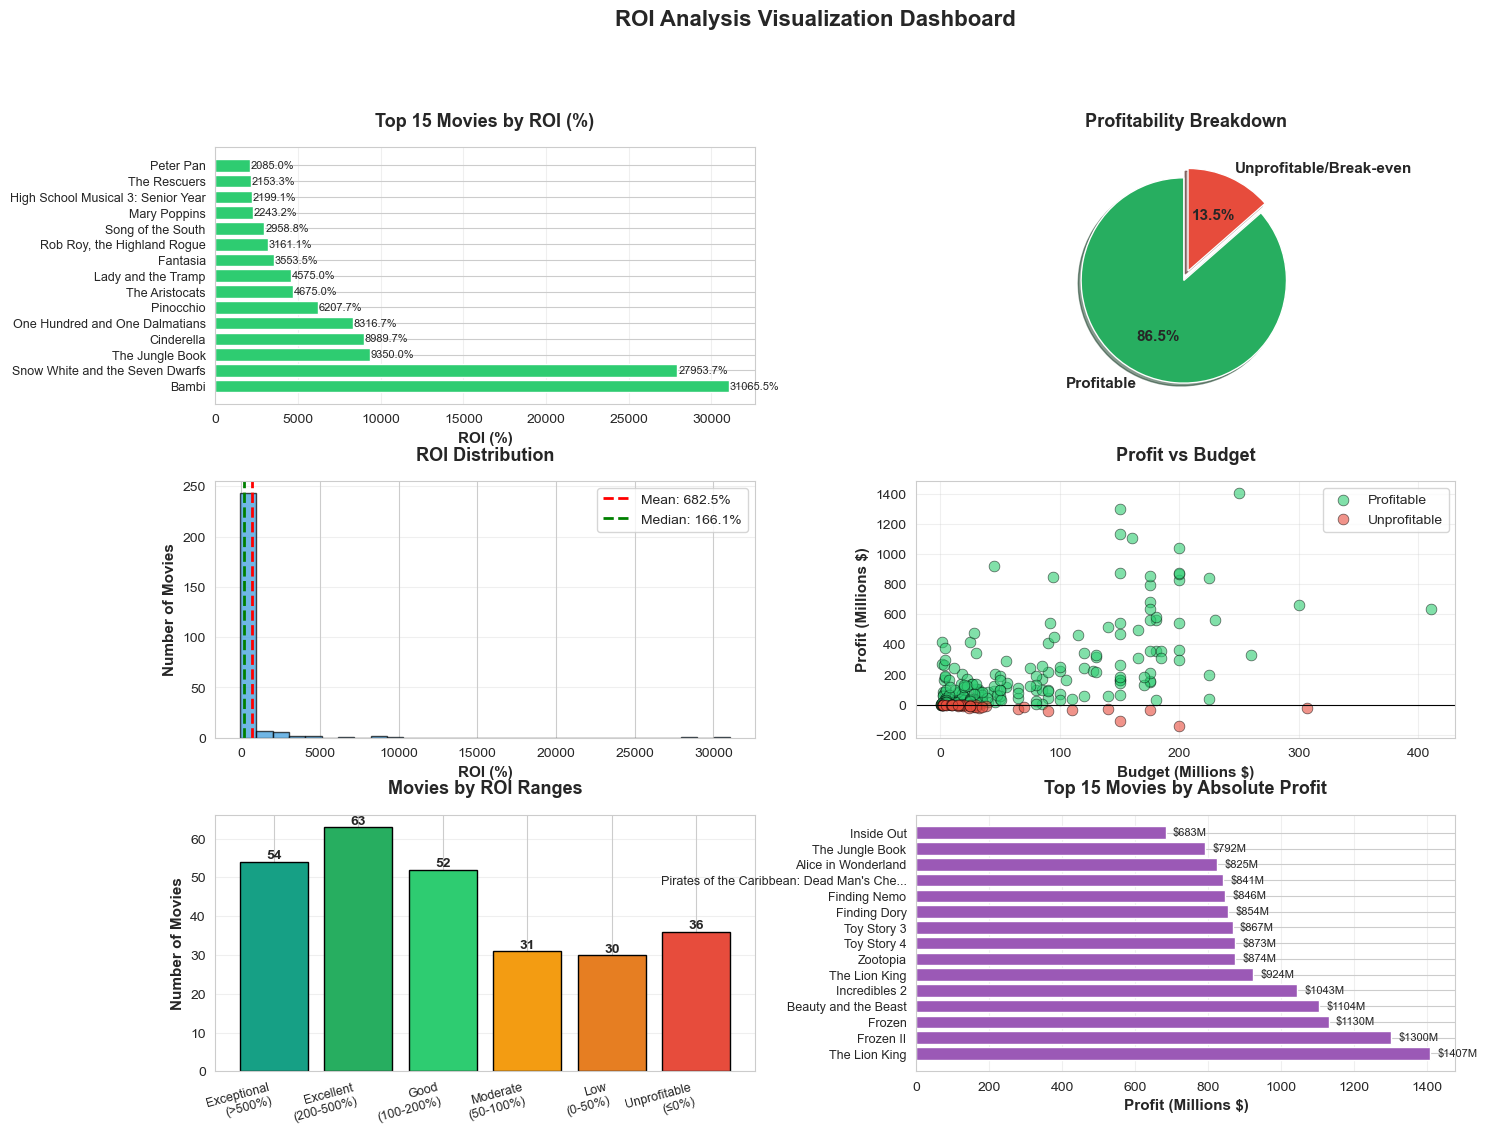


VISUALIZATION SUMMARY
Total movies analyzed: 266
Average ROI: 682.53%
Median ROI: 166.06%
Profitable movies: 230 (86.5%)
Total profit: $41,773,777,851


In [24]:
# Visualizations for ROI Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

# Read and calculate ROI if not already done
if 'roi_df' not in locals() or 'roi' not in roi_df.columns:
    if 'roi_df' not in locals():
        roi_df = pd.read_excel('ROI_dataset.xlsx', engine='openpyxl')
    roi_df['profit'] = roi_df['box_office'] - roi_df['budget']
    roi_df['roi'] = ((roi_df['box_office'] - roi_df['budget']) / roi_df['budget']) * 100
    roi_df['box_office_multiplier'] = roi_df['box_office'] / roi_df['budget']

# Create subplots
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# 1. Top 15 Movies by ROI
ax1 = fig.add_subplot(gs[0, 0])
top_15_roi = roi_df.nlargest(15, 'roi')
bars1 = ax1.barh(range(len(top_15_roi)), top_15_roi['roi'], color='#2ecc71')
ax1.set_yticks(range(len(top_15_roi)))
ax1.set_yticklabels([title[:40] + '...' if len(title) > 40 else title for title in top_15_roi['title']], fontsize=9)
ax1.set_xlabel('ROI (%)', fontsize=11, fontweight='bold')
ax1.set_title('Top 15 Movies by ROI (%)', fontsize=13, fontweight='bold', pad=15)
ax1.grid(axis='x', alpha=0.3)
# Add value labels on bars
for i, (idx, row) in enumerate(top_15_roi.iterrows()):
    ax1.text(row['roi'] + 50, i, f"{row['roi']:.1f}%", va='center', fontsize=8)

# 2. Profitability Breakdown (Pie Chart)
ax2 = fig.add_subplot(gs[0, 1])
profitable_count = (roi_df['profit'] > 0).sum()
unprofitable_count = (roi_df['profit'] <= 0).sum()
colors_pie = ['#27ae60', '#e74c3c']
explode = (0.05, 0.05)
ax2.pie([profitable_count, unprofitable_count], 
        labels=['Profitable', 'Unprofitable/Break-even'],
        autopct='%1.1f%%',
        colors=colors_pie,
        explode=explode,
        shadow=True,
        startangle=90,
        textprops={'fontsize': 11, 'fontweight': 'bold'})
ax2.set_title('Profitability Breakdown', fontsize=13, fontweight='bold', pad=15)

# 3. ROI Distribution (Histogram)
ax3 = fig.add_subplot(gs[1, 0])
ax3.hist(roi_df['roi'], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
ax3.axvline(roi_df['roi'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {roi_df['roi'].mean():.1f}%")
ax3.axvline(roi_df['roi'].median(), color='green', linestyle='--', linewidth=2, label=f"Median: {roi_df['roi'].median():.1f}%")
ax3.set_xlabel('ROI (%)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Number of Movies', fontsize=11, fontweight='bold')
ax3.set_title('ROI Distribution', fontsize=13, fontweight='bold', pad=15)
ax3.legend(fontsize=10)
ax3.grid(axis='y', alpha=0.3)

# 4. Profit vs Budget (Scatter Plot)
ax4 = fig.add_subplot(gs[1, 1])
profitable_df = roi_df[roi_df['profit'] > 0]
unprofitable_df = roi_df[roi_df['profit'] <= 0]
ax4.scatter(profitable_df['budget']/1e6, profitable_df['profit']/1e6, 
           alpha=0.6, color='#2ecc71', s=60, label='Profitable', edgecolors='black', linewidth=0.5)
ax4.scatter(unprofitable_df['budget']/1e6, unprofitable_df['profit']/1e6, 
           alpha=0.6, color='#e74c3c', s=60, label='Unprofitable', edgecolors='black', linewidth=0.5)
ax4.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax4.set_xlabel('Budget (Millions $)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Profit (Millions $)', fontsize=11, fontweight='bold')
ax4.set_title('Profit vs Budget', fontsize=13, fontweight='bold', pad=15)
ax4.legend(fontsize=10)
ax4.grid(alpha=0.3)

# 5. ROI Ranges (Bar Chart)
ax5 = fig.add_subplot(gs[2, 0])
roi_ranges = [
    ('Exceptional\n(>500%)', (roi_df['roi'] > 500).sum()),
    ('Excellent\n(200-500%)', ((roi_df['roi'] > 200) & (roi_df['roi'] <= 500)).sum()),
    ('Good\n(100-200%)', ((roi_df['roi'] > 100) & (roi_df['roi'] <= 200)).sum()),
    ('Moderate\n(50-100%)', ((roi_df['roi'] > 50) & (roi_df['roi'] <= 100)).sum()),
    ('Low\n(0-50%)', ((roi_df['roi'] > 0) & (roi_df['roi'] <= 50)).sum()),
    ('Unprofitable\n(≤0%)', (roi_df['roi'] <= 0).sum())
]
labels = [x[0] for x in roi_ranges]
counts = [x[1] for x in roi_ranges]
colors_bar = ['#16a085', '#27ae60', '#2ecc71', '#f39c12', '#e67e22', '#e74c3c']
bars5 = ax5.bar(labels, counts, color=colors_bar, edgecolor='black', linewidth=1)
ax5.set_ylabel('Number of Movies', fontsize=11, fontweight='bold')
ax5.set_title('Movies by ROI Ranges', fontsize=13, fontweight='bold', pad=15)
ax5.set_xticklabels(labels, rotation=15, ha='right', fontsize=9)
ax5.grid(axis='y', alpha=0.3)
# Add value labels on bars
for bar in bars5:
    height = bar.get_height()
    if height > 0:
        ax5.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# 6. Top 15 Movies by Absolute Profit
ax6 = fig.add_subplot(gs[2, 1])
top_15_profit = roi_df.nlargest(15, 'profit')
bars6 = ax6.barh(range(len(top_15_profit)), top_15_profit['profit']/1e6, color='#9b59b6')
ax6.set_yticks(range(len(top_15_profit)))
ax6.set_yticklabels([title[:40] + '...' if len(title) > 40 else title for title in top_15_profit['title']], fontsize=9)
ax6.set_xlabel('Profit (Millions $)', fontsize=11, fontweight='bold')
ax6.set_title('Top 15 Movies by Absolute Profit', fontsize=13, fontweight='bold', pad=15)
ax6.grid(axis='x', alpha=0.3)
# Add value labels on bars
for i, (idx, row) in enumerate(top_15_profit.iterrows()):
    ax6.text(row['profit']/1e6 + 20, i, f"${row['profit']/1e6:.0f}M", va='center', fontsize=8)

plt.suptitle('ROI Analysis Visualization Dashboard', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Summary statistics text box
print("\n" + "=" * 70)
print("VISUALIZATION SUMMARY")
print("=" * 70)
print(f"Total movies analyzed: {len(roi_df)}")
print(f"Average ROI: {roi_df['roi'].mean():.2f}%")
print(f"Median ROI: {roi_df['roi'].median():.2f}%")
print(f"Profitable movies: {(roi_df['profit'] > 0).sum()} ({(roi_df['profit'] > 0).sum()/len(roi_df)*100:.1f}%)")
print(f"Total profit: ${roi_df['profit'].sum():,.0f}")
print("=" * 70)


In [25]:
# Director and Composer Success Metrics Analysis
# Read the ROI_dataset if not already loaded
if 'roi_df' not in locals():
    roi_df = pd.read_excel('ROI_dataset.xlsx', engine='openpyxl')

# Calculate ROI metrics if not already calculated
if 'roi' not in roi_df.columns:
    roi_df['profit'] = roi_df['box_office'] - roi_df['budget']
    roi_df['roi'] = ((roi_df['box_office'] - roi_df['budget']) / roi_df['budget']) * 100
    roi_df['box_office_multiplier'] = roi_df['box_office'] / roi_df['budget']

import ast

def extract_names(value):
    """Extract names from director/composer columns - handles lists, strings, or NaN"""
    if pd.isna(value):
        return ['Unknown']
    if isinstance(value, str):
        # Check if it looks like a list string
        if value.strip().startswith('[') and value.strip().endswith(']'):
            try:
                names_list = ast.literal_eval(value)
                if isinstance(names_list, list):
                    # Clean up names - take first name only if it's in format "First Last (additional info)"
                    cleaned = []
                    for name in names_list:
                        if isinstance(name, str):
                            # Remove anything in parentheses
                            clean_name = name.split('(')[0].strip()
                            if clean_name and clean_name not in ['', 'Unknown']:
                                cleaned.append(clean_name)
                    return cleaned if cleaned else ['Unknown']
                else:
                    return [str(names_list)]
            except:
                # If parsing fails, treat as single string
                return [str(value).split(',')[0].strip()]
        else:
            # Regular string - split by comma and take first
            return [str(value).split(',')[0].strip()]
    elif isinstance(value, list):
        # Already a list
        cleaned = []
        for name in value:
            if isinstance(name, str):
                clean_name = name.split('(')[0].strip()
                if clean_name:
                    cleaned.append(clean_name)
        return cleaned if cleaned else ['Unknown']
    else:
        return ['Unknown']

# Create expanded dataframes for directors and composers
director_rows = []
composer_rows = []

for idx, row in roi_df.iterrows():
    directors = extract_names(row['director'])
    composers = extract_names(row['composer'])
    
    # Create one row per director
    for director in directors:
        director_rows.append({
            'name': director,
            'title': row['title'],
            'budget': row['budget'],
            'box_office': row['box_office'],
            'profit': row.get('profit', row['box_office'] - row['budget']),
            'roi': row.get('roi', ((row['box_office'] - row['budget']) / row['budget']) * 100)
        })
    
    # Create one row per composer
    for composer in composers:
        composer_rows.append({
            'name': composer,
            'title': row['title'],
            'budget': row['budget'],
            'box_office': row['box_office'],
            'profit': row.get('profit', row['box_office'] - row['budget']),
            'roi': row.get('roi', ((row['box_office'] - row['budget']) / row['budget']) * 100)
        })

director_df = pd.DataFrame(director_rows)
composer_df = pd.DataFrame(composer_rows)

# Calculate statistics by director
director_stats = director_df.groupby('name').agg({
    'roi': 'mean',
    'profit': 'mean',
    'title': 'count',
    'budget': 'mean',
    'box_office': 'mean'
}).rename(columns={
    'title': 'movie_count',
    'roi': 'avg_roi',
    'profit': 'avg_profit',
    'budget': 'avg_budget',
    'box_office': 'avg_box_office'
}).sort_values('avg_roi', ascending=False)

# Filter directors with at least 2 movies
director_stats_filtered = director_stats[director_stats['movie_count'] >= 2].copy()

# Calculate statistics by composer
composer_stats = composer_df.groupby('name').agg({
    'roi': 'mean',
    'profit': 'mean',
    'title': 'count',
    'budget': 'mean',
    'box_office': 'mean'
}).rename(columns={
    'title': 'movie_count',
    'roi': 'avg_roi',
    'profit': 'avg_profit',
    'budget': 'avg_budget',
    'box_office': 'avg_box_office'
}).sort_values('avg_roi', ascending=False)

# Filter composers with at least 2 movies
composer_stats_filtered = composer_stats[composer_stats['movie_count'] >= 2].copy()

print("=" * 70)
print("DIRECTOR & COMPOSER SUCCESS METRICS - ROI ANALYSIS")
print("=" * 70)

# DIRECTORS ANALYSIS
print("\n" + "=" * 70)
print("🎬 TOP DIRECTORS BY AVERAGE ROI (Minimum 2 movies)")
print("=" * 70)
if len(director_stats_filtered) > 0:
    # Store summary stats before formatting
    max_roi = director_stats_filtered['avg_roi'].max()
    
    top_directors = director_stats_filtered.head(15).copy()
    top_directors['avg_roi'] = top_directors['avg_roi'].apply(lambda x: f"{x:.1f}%")
    top_directors['avg_profit'] = top_directors['avg_profit'].apply(lambda x: f"${x:,.0f}")
    top_directors['avg_budget'] = top_directors['avg_budget'].apply(lambda x: f"${x:,.0f}")
    top_directors['avg_box_office'] = top_directors['avg_box_office'].apply(lambda x: f"${x:,.0f}")
    top_directors['movie_count'] = top_directors['movie_count'].astype(int)
    print(top_directors.to_string())
    
    print(f"\n📊 Director Summary:")
    print(f"  Total unique directors: {director_stats.shape[0]}")
    print(f"  Directors with 2+ movies: {director_stats_filtered.shape[0]}")
    print(f"  Highest average ROI: {max_roi:.1f}%")
    print(f"  Average ROI (all directors): {director_stats['avg_roi'].mean():.1f}%")
else:
    print("No directors with 2+ movies found")

# COMPOSERS ANALYSIS
print("\n" + "=" * 70)
print("🎵 TOP COMPOSERS BY AVERAGE ROI (Minimum 2 movies)")
print("=" * 70)
if len(composer_stats_filtered) > 0:
    # Store summary stats before formatting
    max_roi_composer = composer_stats_filtered['avg_roi'].max()
    
    top_composers = composer_stats_filtered.head(15).copy()
    top_composers['avg_roi'] = top_composers['avg_roi'].apply(lambda x: f"{x:.1f}%")
    top_composers['avg_profit'] = top_composers['avg_profit'].apply(lambda x: f"${x:,.0f}")
    top_composers['avg_budget'] = top_composers['avg_budget'].apply(lambda x: f"${x:,.0f}")
    top_composers['avg_box_office'] = top_composers['avg_box_office'].apply(lambda x: f"${x:,.0f}")
    top_composers['movie_count'] = top_composers['movie_count'].astype(int)
    print(top_composers.to_string())
    
    print(f"\n📊 Composer Summary:")
    print(f"  Total unique composers: {composer_stats.shape[0]}")
    print(f"  Composers with 2+ movies: {composer_stats_filtered.shape[0]}")
    print(f"  Highest average ROI: {max_roi_composer:.1f}%")
    print(f"  Average ROI (all composers): {composer_stats['avg_roi'].mean():.1f}%")
else:
    print("No composers with 2+ movies found")

# Top performers by total profit
print("\n" + "=" * 70)
print("💵 TOP DIRECTORS BY TOTAL PROFIT (Minimum 2 movies)")
print("=" * 70)
if len(director_stats_filtered) > 0:
    director_total_profit = director_df[director_df['name'].isin(director_stats_filtered.index)].groupby('name').agg({
        'profit': 'sum',
        'title': 'count'
    }).rename(columns={'title': 'movie_count'}).sort_values('profit', ascending=False)
    
    top_profit_directors = director_total_profit.head(10).copy()
    top_profit_directors['profit'] = top_profit_directors['profit'].apply(lambda x: f"${x:,.0f}")
    top_profit_directors['movie_count'] = top_profit_directors['movie_count'].astype(int)
    print(top_profit_directors.to_string())

print("\n" + "=" * 70)
print("💵 TOP COMPOSERS BY TOTAL PROFIT (Minimum 2 movies)")
print("=" * 70)
if len(composer_stats_filtered) > 0:
    composer_total_profit = composer_df[composer_df['name'].isin(composer_stats_filtered.index)].groupby('name').agg({
        'profit': 'sum',
        'title': 'count'
    }).rename(columns={'title': 'movie_count'}).sort_values('profit', ascending=False)
    
    top_profit_composers = composer_total_profit.head(10).copy()
    top_profit_composers['profit'] = top_profit_composers['profit'].apply(lambda x: f"${x:,.0f}")
    top_profit_composers['movie_count'] = top_profit_composers['movie_count'].astype(int)
    print(top_profit_composers.to_string())

print("=" * 70)


DIRECTOR & COMPOSER SUCCESS METRICS - ROI ANALYSIS

🎬 TOP DIRECTORS BY AVERAGE ROI (Minimum 2 movies)
                      avg_roi    avg_profit  movie_count   avg_budget avg_box_office
name                                                                                
David Hand           29509.6%  $341,526,000            2   $1,174,000   $342,700,000
Paul Satterfield     17309.5%  $173,781,000            2   $1,569,000   $175,350,000
Samuel Armstrong     11552.0%  $115,970,667            3   $1,362,667   $117,333,333
Ben Sharpsteen        9437.9%  $164,820,000            4   $1,830,000   $166,650,000
Bill Roberts          6852.8%   $85,286,167            6   $1,462,167    $86,748,333
James Algar           5958.6%   $59,523,400            6  $14,934,767    $74,458,167
Wilfred Jackson       5138.0%  $113,901,364           11   $2,361,818   $116,263,182
T. Hee                4880.6%  $121,210,000            2   $2,440,000   $123,650,000
Wolfgang Reitherman   3776.4%  $159,100,000     

/Users/torao/anaconda3/lib/python3.11/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/var/folders/dw/nstqlg1n52j63yjdvsbbrl7w0000gn/T/ipykernel_24653/1210375753.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


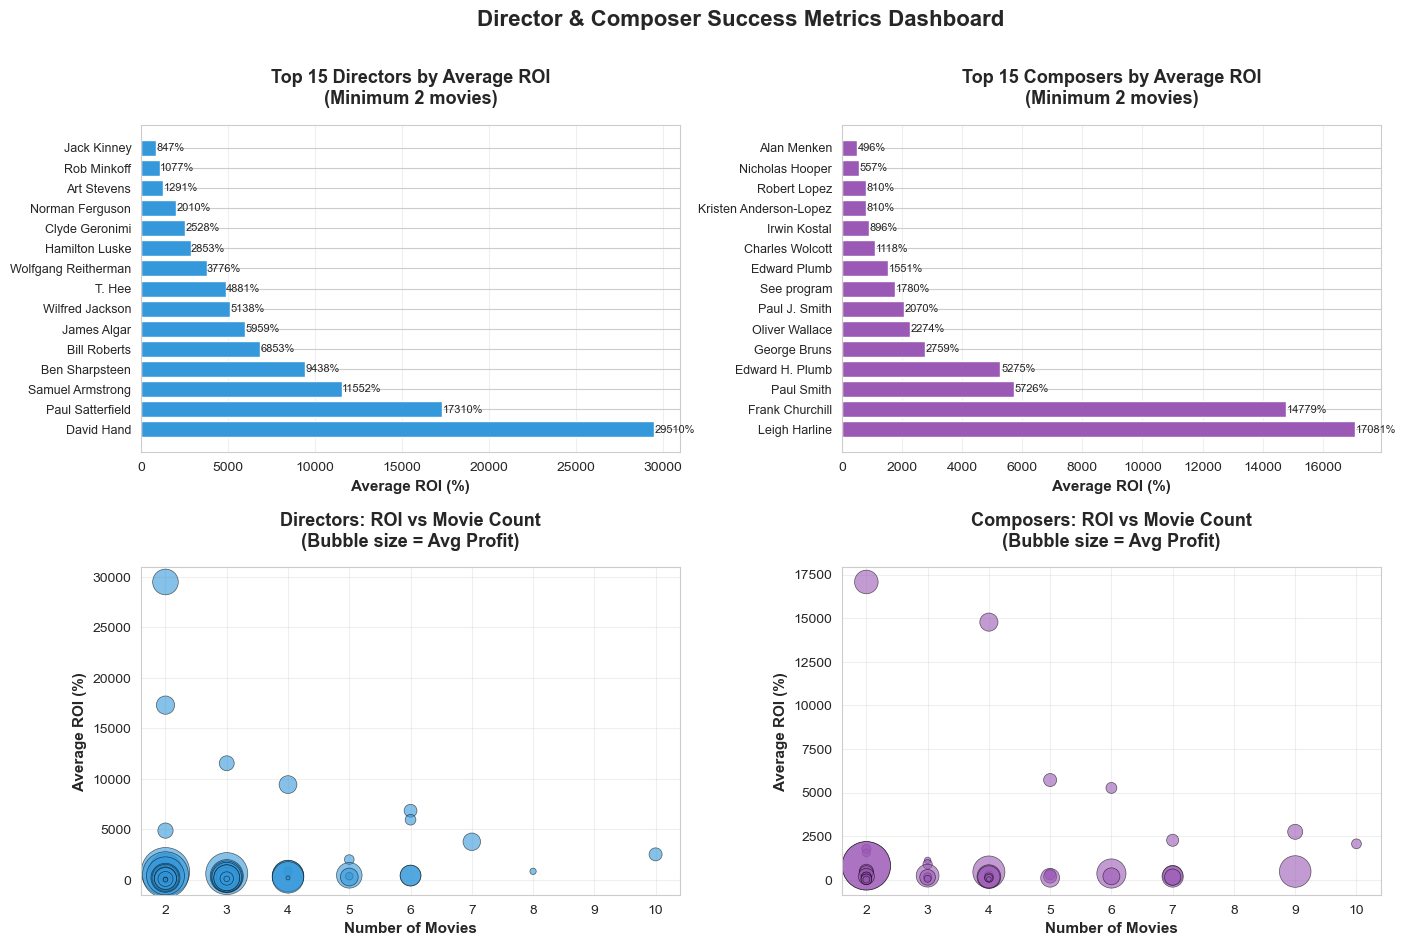

In [26]:
# Visualizations for Director and Composer ROI Analysis
# Note: Run Cell 6 (Director/Composer Analysis) first before running this cell

import matplotlib.pyplot as plt
import seaborn as sns

# Check if the required data exists from previous cell
if 'director_stats_filtered' in locals() and 'composer_stats_filtered' in locals() and len(director_stats_filtered) > 0 and len(composer_stats_filtered) > 0:
    # Create visualizations
    fig = plt.figure(figsize=(16, 10))
    gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.3)

    # 1. Top 15 Directors by Average ROI
    ax1 = fig.add_subplot(gs[0, 0])
    top_15_dir = director_stats_filtered.head(15)
    bars1 = ax1.barh(range(len(top_15_dir)), top_15_dir['avg_roi'], color='#3498db')
    ax1.set_yticks(range(len(top_15_dir)))
    ax1.set_yticklabels([name[:30] + '...' if len(name) > 30 else name for name in top_15_dir.index], fontsize=9)
    ax1.set_xlabel('Average ROI (%)', fontsize=11, fontweight='bold')
    ax1.set_title('Top 15 Directors by Average ROI\n(Minimum 2 movies)', fontsize=13, fontweight='bold', pad=15)
    ax1.grid(axis='x', alpha=0.3)
    # Add value labels
    for i, (name, row) in enumerate(top_15_dir.iterrows()):
        ax1.text(row['avg_roi'] + 20, i, f"{row['avg_roi']:.0f}%", va='center', fontsize=8)

    # 2. Top 15 Composers by Average ROI
    ax2 = fig.add_subplot(gs[0, 1])
    top_15_comp = composer_stats_filtered.head(15)
    bars2 = ax2.barh(range(len(top_15_comp)), top_15_comp['avg_roi'], color='#9b59b6')
    ax2.set_yticks(range(len(top_15_comp)))
    ax2.set_yticklabels([name[:30] + '...' if len(name) > 30 else name for name in top_15_comp.index], fontsize=9)
    ax2.set_xlabel('Average ROI (%)', fontsize=11, fontweight='bold')
    ax2.set_title('Top 15 Composers by Average ROI\n(Minimum 2 movies)', fontsize=13, fontweight='bold', pad=15)
    ax2.grid(axis='x', alpha=0.3)
    # Add value labels
    for i, (name, row) in enumerate(top_15_comp.iterrows()):
        ax2.text(row['avg_roi'] + 20, i, f"{row['avg_roi']:.0f}%", va='center', fontsize=8)

    # 3. Directors: Average ROI vs Number of Movies
    ax3 = fig.add_subplot(gs[1, 0])
    scatter_dirs = director_stats_filtered[director_stats_filtered['movie_count'] <= 10].copy()
    if len(scatter_dirs) > 0:
        ax3.scatter(scatter_dirs['movie_count'], scatter_dirs['avg_roi'], 
                   s=scatter_dirs['avg_profit']/1e6, alpha=0.6, color='#3498db', edgecolors='black', linewidth=0.5)
    ax3.set_xlabel('Number of Movies', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Average ROI (%)', fontsize=11, fontweight='bold')
    ax3.set_title('Directors: ROI vs Movie Count\n(Bubble size = Avg Profit)', fontsize=13, fontweight='bold', pad=15)
    ax3.grid(alpha=0.3)

    # 4. Composers: Average ROI vs Number of Movies
    ax4 = fig.add_subplot(gs[1, 1])
    scatter_comps = composer_stats_filtered[composer_stats_filtered['movie_count'] <= 10].copy()
    if len(scatter_comps) > 0:
        ax4.scatter(scatter_comps['movie_count'], scatter_comps['avg_roi'], 
                   s=scatter_comps['avg_profit']/1e6, alpha=0.6, color='#9b59b6', edgecolors='black', linewidth=0.5)
    ax4.set_xlabel('Number of Movies', fontsize=11, fontweight='bold')
    ax4.set_ylabel('Average ROI (%)', fontsize=11, fontweight='bold')
    ax4.set_title('Composers: ROI vs Movie Count\n(Bubble size = Avg Profit)', fontsize=13, fontweight='bold', pad=15)
    ax4.grid(alpha=0.3)

    plt.suptitle('Director & Composer Success Metrics Dashboard', fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️  Please run Cell 6 (Director/Composer Analysis) first to generate the required data.")
    print("This visualization cell requires the director_stats_filtered and composer_stats_filtered dataframes.")
